## Problem Statement:
Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer's segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

### Steps are:
1. [Gathering Data](#1)
2. [Feature Engineering](#2)
3. [Data Cleaning](#3)
4. [Exploratory Data Analysis](#4)
5. [Data Preprocessing](#5)
6. [Machine Learning Model Selection](#6)
7. [Hyperparameter turning ](#7)
8. [Model Evalution](#8)

### Dataset Key Information.
- loan_id                ----->         Unique loan ID
- no_of_dependents       ----->       Number of dependents of the applicant
- education       ----->       Education level of the applicant
- self_employed       ----->       If the applicant is self-employed or not
- income_annum       ----->       Annual income of the applicant
- loan_amount       ----->       Loan amount requested by the applicant
- loan_tenure       ----->       Tenure of the loan requested by the applicant (in Years)
- cibil_score       ----->       CIBIL score of the applicant
- residential_asset_value       ----->       Value of the residential asset of the applicant
- commercial_asset_value       ----->       Value of the commercial asset of the applicant
- luxury_asset_value       ----->       Value of the luxury asset of the applicant
- bank_assets_value       ----->       Value of the bank asset of the applicant
- loan_status       ----->       Status of the loan (Approved/Rejected)

### Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id="1"></a>
### 1. Gathering Data

In [2]:
df = pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


<a id="2"></a><br>
### 2. Feature Engineering

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [5]:
list(df.columns.values)

['loan_id',
 ' no_of_dependents',
 ' education',
 ' self_employed',
 ' income_annum',
 ' loan_amount',
 ' loan_term',
 ' cibil_score',
 ' residential_assets_value',
 ' commercial_assets_value',
 ' luxury_assets_value',
 ' bank_asset_value',
 ' loan_status']

##### Before we move any further it is necessary to fix the column names for proper access.

In [6]:
df.columns = [i.strip() for i in list(df.columns.values)]
list(df.columns.values)

['loan_id',
 'no_of_dependents',
 'education',
 'self_employed',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value',
 'loan_status']

##### Loan Status has no dependancy with Loan ID. It is a mere numbering ID which does not have any significant importance with the data analysis.

In [7]:
df.drop(['loan_id'],axis=1,inplace=True)

<a id="3"></a><br>
### 3. Data Cleaning

In [8]:
df.isna().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

##### It is obvious that the dataset acquired is well maintained as it contains not a single invalid or null values. This not only reduces the time and effort it would take to clean the data but also assure the retainance of high quality data in the dataset for further processing.

<a id="4"></a>
### 4. EDA

In [9]:
sns.set_style('dark')

Text(0.5, 1.0, 'Number of Dependents')

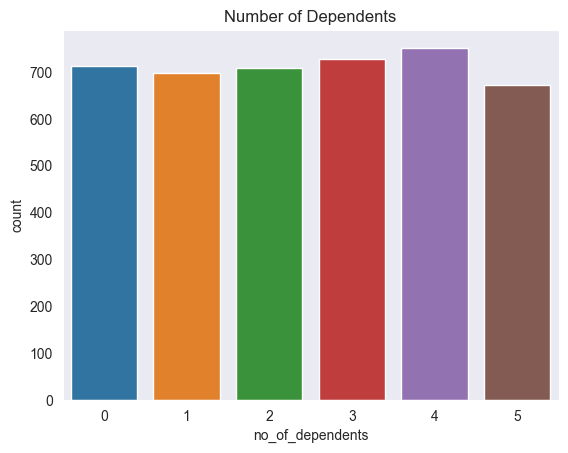

In [10]:
sns.countplot(x = 'no_of_dependents', data = df).set_title('Number of Dependents')

##### With higher number of people depending on a income, the chances of getting a loan realistically lowers. It is even noteworthy to count in unpredictable variables that cost income such as healthcare, that the higher the number of dependents are, the lower the chance of getting a loan approval. This means people with low number of depemdents like 0 or 1 has incredibly higher chance to get an approval than people with higher number of dependents.

Text(0.5, 1.0, 'Number of Dependents')

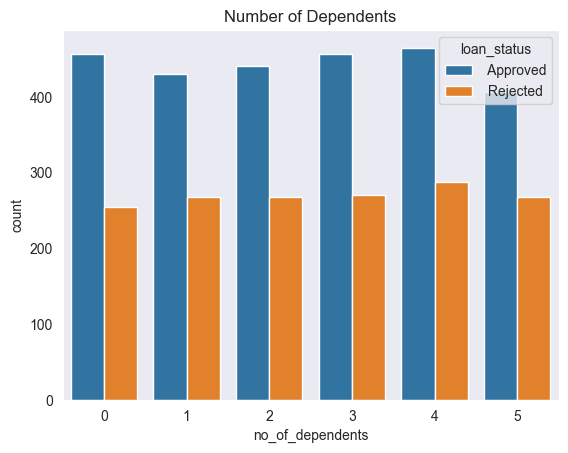

In [11]:
sns.countplot(x = 'no_of_dependents', hue = 'loan_status', data = df).set_title('Number of Dependents')

##### Seems like the insight was factually incorrect. The number of dependents barely affect the approval of a loan given its almost independent for any number of dependents. It shows that sometimes what we assume is logically plausible might not match what actually happens.

Text(0.5, 1.0, 'Self Employed')

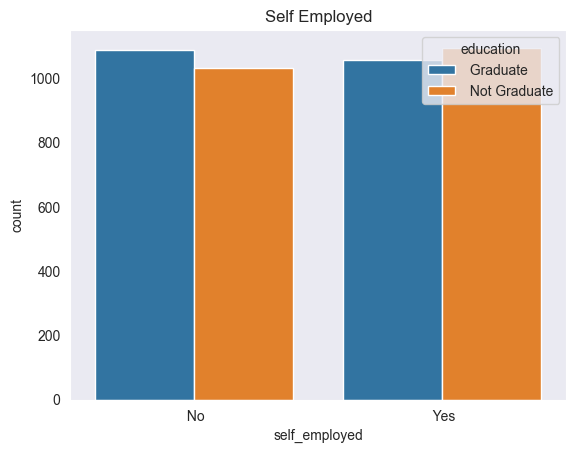

In [12]:
sns.countplot(x='self_employed', data = df, hue = 'education').set_title('Self Employed')

##### Again the graph seems pretty even so nothing of significance to be taken from education and sel employment as well.


Text(0.5, 1.0, 'Loan Amount vs. Loan Term')

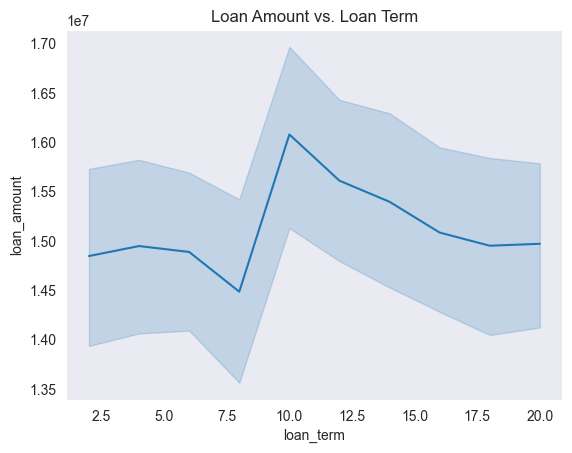

In [13]:
sns.lineplot(x = 'loan_term', y = 'loan_amount', data = df).set_title('Loan Amount vs. Loan Term')

##### This line plot shows the trend between the loan amount and the loan tenure. Between the loan tenure of 2.5 - 7.5 years the loan amount is between 14m - 15.5m. However the loan amount is significantly higher for the loan tenure of 10 years.

<Axes: xlabel='loan_status', ylabel='loan_amount'>

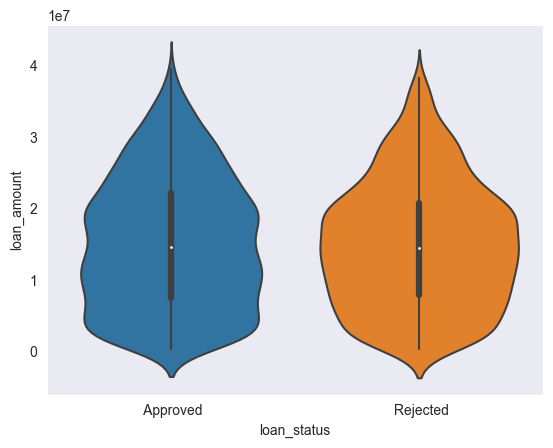

In [14]:
sns.violinplot(x='loan_status', y='loan_amount', data=df)

### CIBIL Score Vs Loan Status

<Axes: xlabel='loan_status', ylabel='cibil_score'>

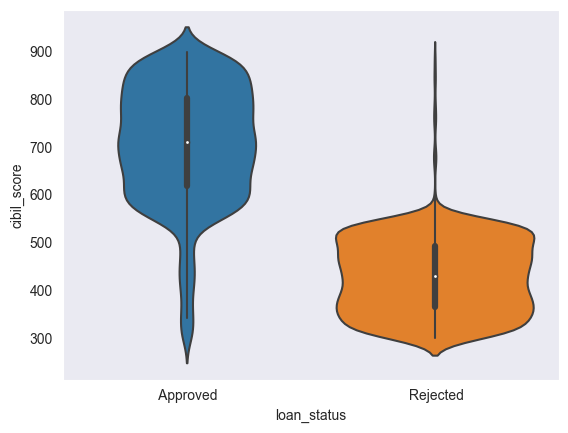

In [15]:
sns.violinplot(x='loan_status', y='cibil_score', data=df)

##### The graph with the shapes (violinplot) shows that people who got their loans approved tend to have higher CIBIL scores, mostly above 600. But for those whose loans weren't approved, the scores are more spread out and usually lower than 550. This means having a higher CIBIL score, especially over 600, really boosts the chances of getting a loan approved. It's clear that a good CIBIL score is important for loan approval.

<a id="5"></a><br>
### 5. Data Preprocessing

##### Although EDA Comes before Data Preprocessing generally, it is best to analyse even the catagorical values.

In [16]:
df['education'] = df['education'].apply(lambda x : 1 if x == ' Graduate' else 0)
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,1,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,1,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,0,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,0,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,0,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,0,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [17]:
df['self_employed'] = df['self_employed'].apply(lambda x : 1 if x == ' Yes' else 0)
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [18]:
df['loan_status'] = df['loan_status'].apply(lambda x : 1 if x == ' Approved' else 0)
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


<Axes: >

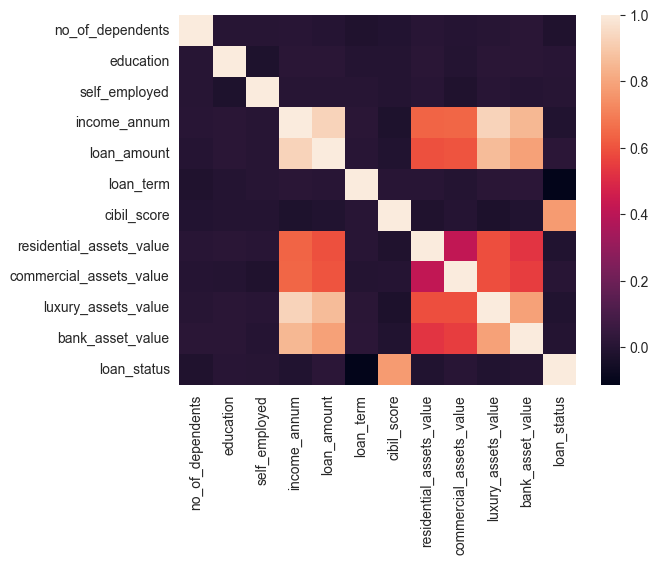

In [19]:
sns.heatmap(df.corr())

<a id="6"></a>
### 6. Machine Learning Model Selection

In [20]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [21]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [20]:
x = df.drop(['loan_status'],axis = 1)
y = df['loan_status']

### Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

##### 1. Logistic Regression

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression()
lm.fit(x_train,y_train)
lm_z = lm.predict(x_test)
print('Accuracy :',accuracy_score(y_test,lm_z))

Accuracy : 0.6112412177985949


##### 2. Support Vector Classification (SVC)

In [23]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
svc_z = svc.predict(x_test)
print('Accuracy :',accuracy_score(y_test,svc_z))

Accuracy : 0.6182669789227166


##### 3. Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_z = dt.predict(x_test)
print('Accuracy :',accuracy_score(y_test,dt_z))

Accuracy : 0.9773614363778298


##### 4. Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_z = rf.predict(x_test)
print('Accuracy :',accuracy_score(y_test,rf_z))

Accuracy : 0.9765807962529274


##### 5. K Nearest Neighbours

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_z = knn.predict(x_test)
print('Accuracy :',accuracy_score(y_test,knn_z))

Accuracy : 0.5394223263075723


##### 6. Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)
nb_z = nb.predict(x_test)
print('Accuracy :',accuracy_score(y_test,nb_z))

Accuracy : 0.750975800156128


##### 7. XGBoost

In [28]:
from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train,y_train)
xgb_z = xgb.predict(x_test)
print('Accuracy :',accuracy_score(y_test,xgb_z))

Accuracy : 0.985167837626854


#### Model Evaluation (Pre Hyper Parameter Tuning) (Top 4 Models)

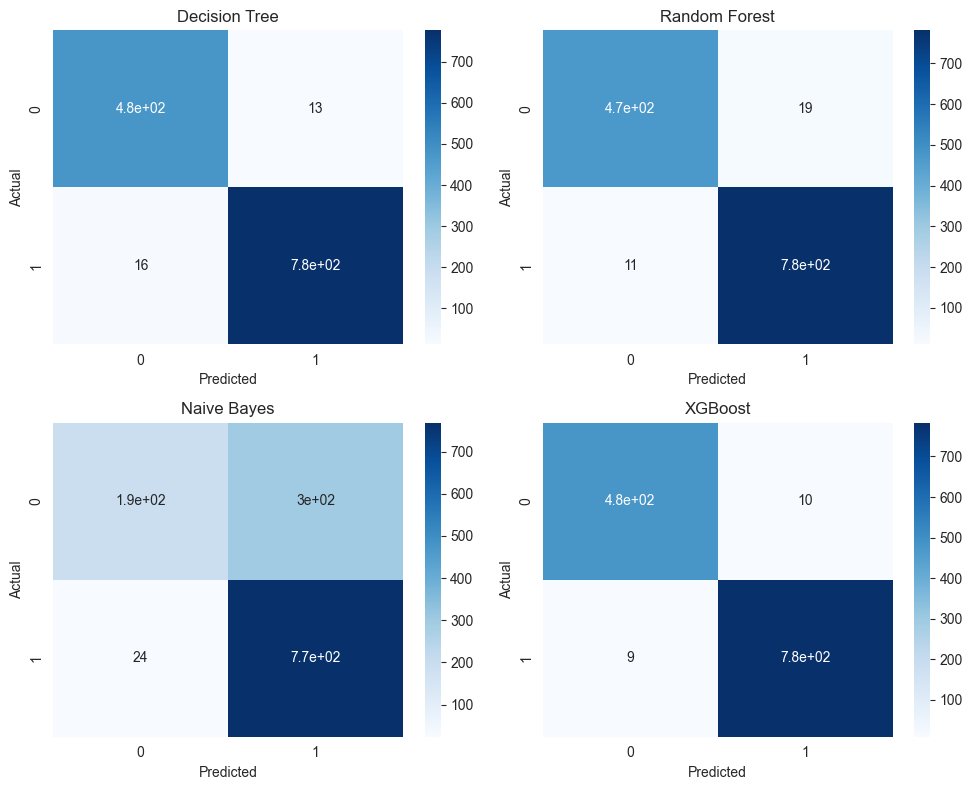

In [29]:
from sklearn.metrics import confusion_matrix


fig, ax = plt.subplots(2, 2, figsize=(10, 8))

sns.heatmap(confusion_matrix(y_test, dt_z), annot=True, ax=ax[0, 0], cmap='Blues').set_title('Decision Tree')
ax[0, 0].set_xlabel('Predicted')
ax[0, 0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, rf_z), annot=True, ax=ax[0, 1], cmap='Blues').set_title('Random Forest')
ax[0, 1].set_xlabel('Predicted')
ax[0, 1].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, nb_z), annot=True, ax=ax[1, 0], cmap='Blues').set_title('Naive Bayes')
ax[1, 0].set_xlabel('Predicted')
ax[1, 0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, xgb_z), annot=True, ax=ax[1, 1], cmap='Blues').set_title('XGBoost')
ax[1, 1].set_xlabel('Predicted')
ax[1, 1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

### Conclusion
##### Summary of Model Performance for Loan Approval Prediction

##### When looking at different ways to predict if loans will be approved or not, we found that the Decision Tree model worked really well. It was accurate and could predict outcomes quite accurately. The Random Forest model also did a good job.

##### However, the models called Support Vector Machine (SVM), Naive Bayes, K Nearesst Neighbours and Logistic Regression didn't work well for this dataset. They didn't predict as accurately as the Decision Tree and Random Forest models.

##### This tells us that picking the right model is really important. The Decision Tree and Random Forest models were great for this data, but SVM and Logistic Regression weren't a good fit

<a id="7"></a>
### 7. Hyper Parameter Tuning
##### Decision Tree

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [31]:
dtree = DecisionTreeClassifier()
gs = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')
gs.fit(x_train, y_train)
best_params = gs.best_params_
print("Best Parameters :", best_params)
dtr = gs.best_estimator_

Best Parameters : {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [32]:
dtr_z = dtr.predict(x_test)
accuracy = accuracy_score(y_test, dtr_z)
print("Accuracy:", accuracy)

Accuracy: 0.9773614363778298


##### Random Forest

In [33]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [34]:
rfc = RandomForestClassifier()
rf_Grid = GridSearchCV(estimator=rfc,param_grid=param_grid,cv=3,verbose=0,n_jobs=-1,return_train_score=False)
rf_Grid.fit(x_train,y_train)
rf_Grid.best_params_

{'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [35]:
rfc = RandomForestClassifier(**rf_Grid.best_params_)
rfc.fit(x_train,y_train)
rfc_z = rfc.predict(x_test)
print('Accuracy :',accuracy_score(y_test,rfc_z))

Accuracy : 0.9789227166276346


<a id="8"></a>
### 8. Model Evaluation

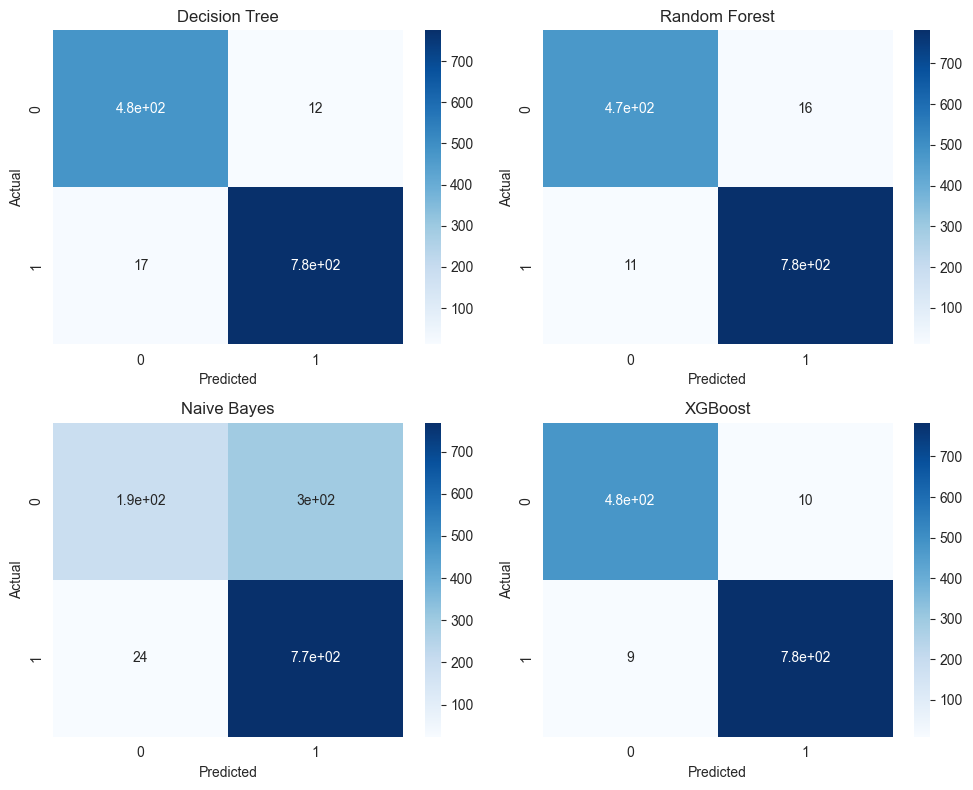

In [36]:
from sklearn.metrics import confusion_matrix


fig, ax = plt.subplots(2, 2, figsize=(10, 8))

sns.heatmap(confusion_matrix(y_test, dtr_z), annot=True, ax=ax[0, 0], cmap='Blues').set_title('Decision Tree')
ax[0, 0].set_xlabel('Predicted')
ax[0, 0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, rfc_z), annot=True, ax=ax[0, 1], cmap='Blues').set_title('Random Forest')
ax[0, 1].set_xlabel('Predicted')
ax[0, 1].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, nb_z), annot=True, ax=ax[1, 0], cmap='Blues').set_title('Naive Bayes')
ax[1, 0].set_xlabel('Predicted')
ax[1, 0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, xgb_z), annot=True, ax=ax[1, 1], cmap='Blues').set_title('XGBoost')
ax[1, 1].set_xlabel('Predicted')
ax[1, 1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

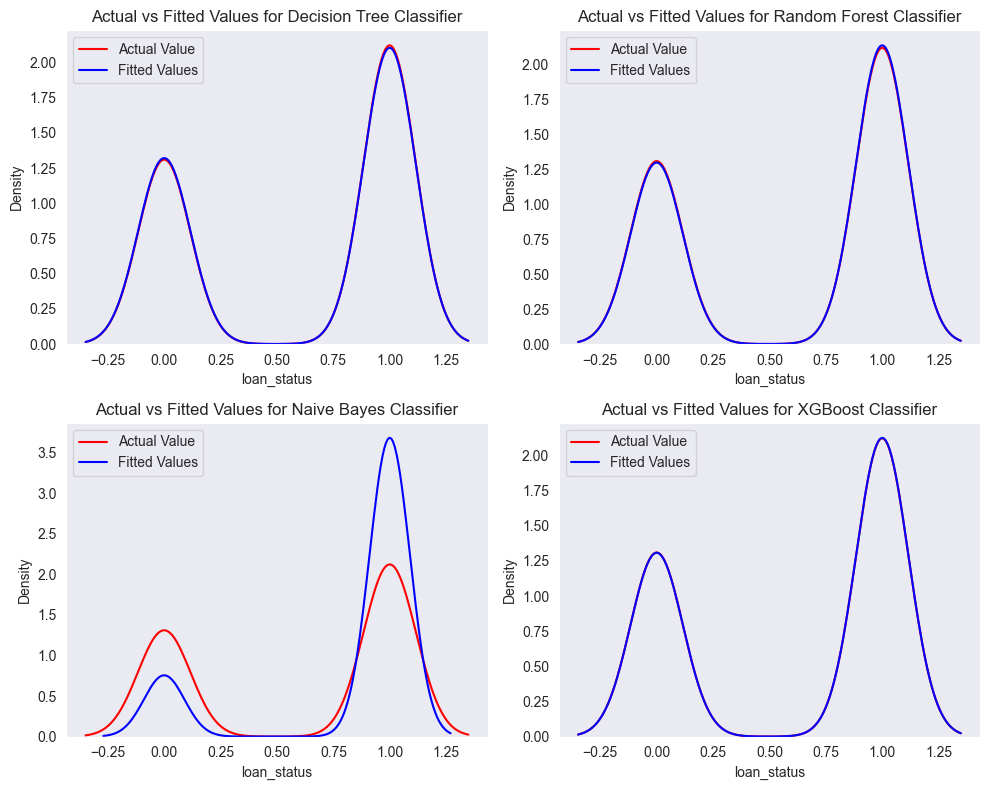

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

sns.kdeplot(y_test, color="r", label="Actual Value", ax=ax[0,0])
sns.kdeplot(dtr_z, color="b", label="Fitted Values", ax=ax[0,0])
ax[0,0].set_title('Actual vs Fitted Values for Decision Tree Classifier')
ax[0,0].legend()

sns.kdeplot(y_test, color="r", label="Actual Value", ax=ax[0,1])
sns.kdeplot(rfc_z, color="b", label="Fitted Values", ax=ax[0,1])
ax[0,1].set_title('Actual vs Fitted Values for Random Forest Classifier')
ax[0,1].legend()

sns.kdeplot(y_test, color="r", label="Actual Value", ax=ax[1,0])
sns.kdeplot(nb_z, color="b", label="Fitted Values", ax=ax[1,0])
ax[1,0].set_title('Actual vs Fitted Values for Naive Bayes Classifier')
ax[1,0].legend()

sns.kdeplot(y_test, color="r", label="Actual Value", ax=ax[1,1])
sns.kdeplot(xgb_z, color="b", label="Fitted Values", ax=ax[1,1])
ax[1,1].set_title('Actual vs Fitted Values for XGBoost Classifier')
ax[1,1].legend()

plt.tight_layout()
plt.show()

In [38]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(y_test, dtr_z))
print(classification_report(y_test, rfc_z))
print(classification_report(y_test, nb_z))
print(classification_report(y_test, xgb_z))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       489
           1       0.98      0.98      0.98       792

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       489
           1       0.98      0.99      0.98       792

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281

              precision    recall  f1-score   support

           0       0.89      0.40      0.55       489
           1       0.72      0.97      0.83       792

    accuracy                           0.75      1281
   macro avg       0.81      0.68      0.69      1281
weighted avg       0.79      0.75      0.72      1281

              preci

Since XGBoost has the highest accuracy and f1 score, we will use it primarily while also allowing options for the top 4 models to be used.

In [44]:
%mkdir models

In [45]:
%cd models

z:\Projects 1\DS\Loan Approval Prediction\models


In [46]:
import joblib

joblib.dump(dtr,'dtr.pkl')
joblib.dump(rfc,'rfc.pkl')
joblib.dump(nb,'nb.pkl')
joblib.dump(xgb,'xgb.pkl')

['xgb.pkl']

In [47]:
%cd ..

z:\Projects 1\DS\Loan Approval Prediction


Now that all the models are saved, lets build a website and an api to access the models